In [51]:
import pandas as pd
from scipy.stats import normaltest

# Statistics Software

To download the software for statistics, follow this link [Action](https://www.fernandogasi.com.br/planejamento-experimental). This software runs only on Windows as a plugin for Excel, so, in order to make this lecture more reproducible we are trying to use open source tools for statistics, if possible in `python`.

In [52]:
df = pd.ExcelFile('/home/ppiper/Dropbox/local/github/explain/data/DADOS DOE 1.xlsx')
df.sheet_names

['GRÁFICO EFEITO',
 'GRÁFICO INTERAÇÕES',
 'TESTE NORMALIDADE',
 'TESTE t  AMSOTRA ÚNICA',
 'TESTE t DUAS AMOSTRAS',
 'TESTE t PAREADO']

In [53]:
df.parse('TESTE NORMALIDADE')['Dados']

0     148.0
1     154.0
2     158.0
3     160.0
4     161.0
5     162.0
6     166.0
7     170.0
8     182.0
9     195.0
10    236.0
11      NaN
12      NaN
13      NaN
14      NaN
Name: Dados, dtype: float64

# Teste de normalidade (Null Hypothesis)

In [54]:
k2, p = normaltest(df.parse('TESTE NORMALIDADE')['Dados'], nan_policy='omit')

/home/ppiper/micromamba/envs/explain/lib/python3.11/site-packages/scipy/stats/_mstats_basic.py:3007: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn(


In [55]:
p

0.001477902301310022

# Teste t for 1 sample

In [56]:
normaltest(df.parse('TESTE t  AMSOTRA ÚNICA')['Dados'], nan_policy='omit')

NormaltestResult(statistic=0.3465794721742597, pvalue=0.8408939422254406)

In [57]:
from scipy.stats import ttest_1samp


In [58]:
ttest_1samp(df.parse('TESTE t  AMSOTRA ÚNICA')['Dados'], 1055,  nan_policy='omit')

TtestResult(statistic=-1.7440220767169234, pvalue=0.09731267819571389, df=19)

# T test for 2 samples

In [59]:
from scipy.stats import ttest_ind

In [67]:
df.parse('TESTE t DUAS AMOSTRAS')['Amostra'][df.parse('TESTE t DUAS AMOSTRAS')['Grupos'] == 'População 1']

0     18.800
1     20.504
2     18.621
3     19.919
4     21.117
5     17.591
6     18.756
7     18.977
8     20.308
9     18.899
10    20.835
11    17.527
12    17.078
13    17.620
14    21.426
15    19.169
16    19.290
17    22.059
18    18.585
19    17.890
20    18.755
21    19.203
22    18.419
23    20.764
24    21.055
Name: Amostra, dtype: float64

In [68]:
df.parse('TESTE t DUAS AMOSTRAS')['Amostra'][df.parse('TESTE t DUAS AMOSTRAS')['Grupos'] == 'População 2']

25    22.284
26    21.901
27    25.302
28    22.447
29    22.771
30    22.057
31    22.881
32    17.968
33    23.382
34    21.043
35    22.629
36    22.860
37    24.515
38    22.426
39    21.203
40    24.620
41    22.058
42    23.150
43    22.787
44    24.009
45    21.491
46    22.699
47    24.662
48    21.983
49    21.917
50    21.198
51    22.909
52    23.327
53    24.534
54    21.152
Name: Amostra, dtype: float64

In [69]:
ttest_ind(
    df.parse('TESTE t DUAS AMOSTRAS')['Amostra'][df.parse('TESTE t DUAS AMOSTRAS')['Grupos'] == 'População 1'], 
    df.parse('TESTE t DUAS AMOSTRAS')['Amostra'][df.parse('TESTE t DUAS AMOSTRAS')['Grupos'] == 'População 2'],  nan_policy='omit')

Ttest_indResult(statistic=-8.621732766440138, pvalue=1.1519310807911091e-11)

In [71]:
df.parse('TESTE t DUAS AMOSTRAS')['Amostra'][df.parse('TESTE t DUAS AMOSTRAS')['Grupos'] == 'População 2']

count    30.00000
mean     22.60550
std       1.43822
min      17.96800
25%      21.93350
50%      22.66400
75%      23.28275
max      25.30200
Name: Amostra, dtype: float64

In [70]:
df.parse('TESTE t DUAS AMOSTRAS')['Amostra'][df.parse('TESTE t DUAS AMOSTRAS')['Grupos'] == 'População 1'].describe()

count    25.000000
mean     19.326680
std       1.362278
min      17.078000
25%      18.585000
50%      18.977000
75%      20.504000
max      22.059000
Name: Amostra, dtype: float64

# Variance Analysis

In [112]:
df = pd.ExcelFile('/home/ppiper/Dropbox/local/github/explain/data/ANOVA 1 FATOR - EXEMPLO.xlsx')
df.sheet_names

['Planilha1', 'Planilha2']

In [113]:
df = df.parse('Planilha1')
df

,Fator,Resistência,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,15,7,NaN,NaN,NaN,NaN,NaN
1,15,7,NaN,NaN,NaN,NaN,NaN
2,15,15,NaN,NaN,NaN,NaN,"Considere um processo, produto ou serviço no q..."
3,15,11,NaN,NaN,NaN,NaN,NaN
4,15,9,NaN,NaN,NaN,NaN,NaN
5,20,12,NaN,NaN,NaN,NaN,NaN
6,20,17,NaN,NaN,NaN,NaN,NaN
7,20,12,NaN,NaN,NaN,NaN,NaN
8,20,18,NaN,NaN,NaN,NaN,NaN
9,20,18,NaN,NaN,NaN,NaN,https://youtu.be/a_K-ftBNwlE


In [114]:
df['Resistência'][df['Fator']==15].mean()

9.8

In [115]:
from scipy.stats import f_oneway

f_oneway(df['Fator'], df['Resistência'])

F_onewayResult(statistic=31.543307754271414, pvalue=9.612542393665426e-07)

In [116]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [118]:
ols("Fator ~ Resistência", data= df).fit()

In [120]:
model = ols("Fator ~ C(Resistência)", data= df).fit()

In [122]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Fator   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                 -0.253
Method:                 Least Squares   F-statistic:                    0.5957
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.809
Time:                        16:01:45   Log-Likelihood:                -78.532
No. Observations:                  25   AIC:                             183.1
Df Residuals:                      12   BIC:                             198.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.6667      4.665      4.645      0.001      11.503      31.830
C(Resistência)[T.9]     -6.6667      9.329     -0.715      0.489     -26.994      13.660
C(Resistência)[T.10]    13.3333      9.329      1.429      0.178      -6.994      33.660
C(Resistência)[T.11]     6.6667      6.597      1.011      0.332      -7.707      21.040
C(Resistência)[T.12]    -1.6667      7.376     -0.226      0.825     -17.737      14.403
C(Resistência)[T.14]     3.3333      9.329      0.357      0.727     -16.994      23.660
C(Resistência)[T.15]     3.3333      7.376      0.452      0.659     -12.737      19.403
C(Resistência)[T.17]    -1.6667      9.329     -0.179      0.861     -21.994      18.660
C(Resistência)[T.18]     0.8333      6.171      0.135      0.895     -12.612      14.278
C(Resistência)[T.19]     5.8333      6.171      0.945      0.363      -7.612      19.278
C(Resistência)[T.22]     8.3333      9.329      0.893      0.389     -11.994      28.660
C(Resistência)[T.23]     8.3333      9.329      0.893      0.389     -11.994      28.660
C(Resistência)[T.25]     8.3333      9.329      0.893      0.389     -11.994      28.660
==============================================================================
Omnibus:                        1.738   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                0.547
Skew:                           0.000   Prob(JB):                        0.761
Kurtosis:                       3.725   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['Fator'], df['Resistência'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
7,9,-6.6667,0.9998,-44.3337,31.0004,False
7,10,13.3333,0.9483,-24.3337,51.0004,False
7,11,6.6667,0.996,-19.9679,33.3013,False
7,12,-1.6667,1.0,-31.4451,28.1117,False
7,14,3.3333,1.0,-34.3337,41.0004,False
7,15,3.3333,1.0,-26.4451,33.1117,False
7,17,-1.6667,1.0,-39.3337,36.0004,False
7,18,0.8333,1.0,-24.0811,25.7477,False
7,19,5.8333,0.9978,-19.0811,30.7477,False
7,22,8.3333,0.9987,-29.3337,46.0004,False


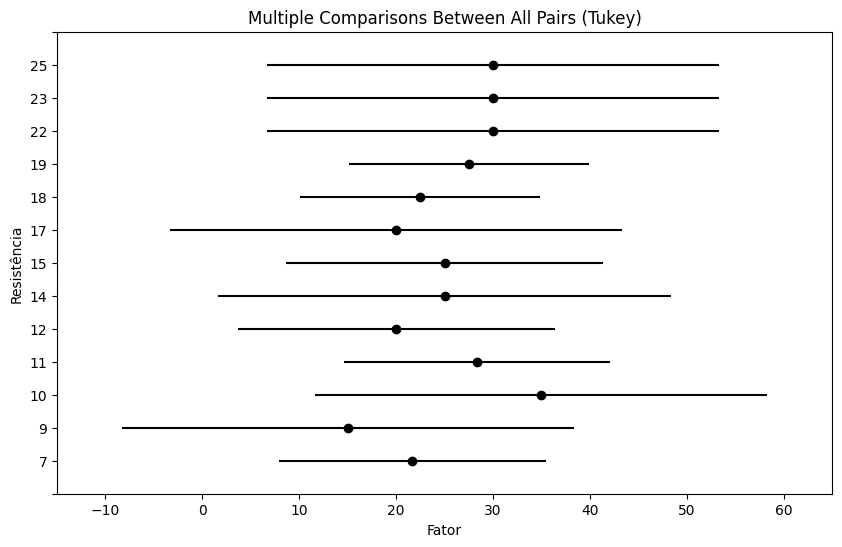

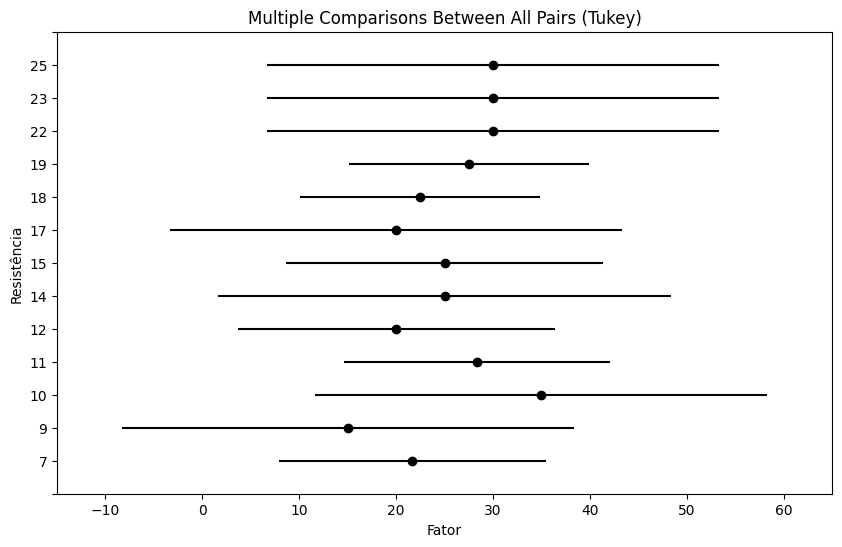

In [126]:
post_hoc_res.plot_simultaneous(ylabel= "Resistência", xlabel= "Fator")

# Exercício ANOVA

In [131]:
df = pd.ExcelFile('/home/ppiper/Dropbox/local/github/explain/data/ANOVA - EXERCÍCIOS.xlsx')
df.sheet_names


['Planilha1', 'Planilha2', 'Planilha3', 'Planilha4']

In [167]:
df = pd.ExcelFile('/home/ppiper/Dropbox/local/github/explain/data/ANOVA - EXERCÍCIOS.xlsx')
letter_to_num = lambda key: {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4
}[key]
df = df.parse('Planilha1')
for i, val in enumerate(df['FATOR']):
    df['FATOR'][i] = letter_to_num(val)
df['FATOR'] = pd.to_numeric(df['FATOR'], errors='coerce')


/tmp/ipykernel_53464/2218617952.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FATOR'][i] = letter_to_num(val)
/tmp/ipykernel_53464/2218617952.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FATOR'][i] = letter_to_num(val)
/tmp/ipykernel_53464/2218617952.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FATOR'][i] = letter_to_num(val)
/tmp/ipykernel_53464/2218617952.py:10: SettingWithCopyWarning: 
A value is t

In [168]:
model = ols("FATOR ~ C(VALOR)", data= df).fit()

In [170]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  FATOR   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                 -0.690
Method:                 Least Squares   F-statistic:                    0.5451
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.856
Time:                        16:29:07   Log-Likelihood:                -26.170
No. Observations:                  40   AIC:                             124.3
Df Residuals:                       4   BIC:                             185.1
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3333      0.850      2.746      0.052      -0.026       4.693
C(VALOR)[T.78.8]      1.6667      1.700      0.981      0.382      -3.052       6.386
C(VALOR)[T.83.1]      1.6667      1.700      0.981      0.382      -3.052       6.386
C(VALOR)[T.83.9]      1.6667      1.700      0.981      0.382      -3.052       6.386
C(VALOR)[T.85.0]      0.6667      1.700      0.392      0.715      -4.052       5.386
C(VALOR)[T.87.2]     -0.3333      1.700     -0.196      0.854      -5.052       4.386
C(VALOR)[T.90.0]      0.6667      1.700      0.392      0.715      -4.052       5.386
C(VALOR)[T.90.2]     -0.3333      1.700     -0.196      0.854      -5.052       4.386
C(VALOR)[T.93.5]     -0.3333      1.700     -0.196      0.854      -5.052       4.386
C(VALOR)[T.94.3]     -1.3333      1.700     -0.784      0.477      -6.052       3.386
C(VALOR)[T.94.8]     -1.3333      1.700     -0.784      0.477      -6.052       3.386
C(VALOR)[T.94.9]     -0.3333      1.700     -0.196      0.854      -5.052       4.386
C(VALOR)[T.95.0]      0.6667      1.700      0.392      0.715      -4.052       5.386
C(VALOR)[T.96.0]     -0.3333      1.700     -0.196      0.854      -5.052       4.386
C(VALOR)[T.96.3]      0.6667      1.344      0.496      0.646      -3.064       4.397
C(VALOR)[T.96.7]     -1.3333      1.700     -0.784      0.477      -6.052       3.386
C(VALOR)[T.97.0]     -1.3333      1.700     -0.784      0.477      -6.052       3.386
C(VALOR)[T.97.7]      1.6667      1.700      0.981      0.382      -3.052       6.386
C(VALOR)[T.98.1]     -1.3333      1.700     -0.784      0.477      -6.052       3.386
C(VALOR)[T.104.3]     0.6667      1.700      0.392      0.715      -4.052       5.386
C(VALOR)[T.104.9]     0.6667      1.700      0.392      0.715      -4.052       5.386
C(VALOR)[T.106.8]    -0.3333      1.700     -0.196      0.854      -5.052       4.386
C(VALOR)[T.107.6]     1.6667      1.700      0.981      0.382      -3.052       6.386
C(VALOR)[T.108.7]     1.6667      1.700      0.981      0.382      -3.052       6.386
C(VALOR)[T.110.0]     0.6667      1.700      0.392      0.715      -4.052       5.386
C(VALOR)[T.111.0]    -1.3333      1.700     -0.784      0.477      -6.052       3.386
C(VALOR)[T.112.0]    -1.3333      1.700     -0.784      0.477      -6.052       3.386
C(VALOR)[T.112.8]     1.6667      1.700      0.981      0.382      -3.052       6.386
C(VALOR)[T.117.3]    -0.3333      1.700     -0.196      0.854      -5.052       4.386
C(VALOR)[T.120.0]    -0.3333      1.700     -0.196      0.854      -5.052       4.386
C(VALOR)[T.122.7]     0.6667      1.700      0.392      0.715      -4.052       5.386
C(VALOR)[T.123.8]    -1.3333      1.700     -0.784      0.477      -6.052       3.386
C(VALOR)[T.130.0]     1.6667      1.700      0.981      0.382      -3.052

In [154]:
from scipy.stats import f_oneway

f_oneway(df['FATOR'], df['VALOR'])

F_onewayResult(statistic=1059.7267016661478, pvalue=3.764728013293859e-47)